Atalov S.

Fundamentals of Machine Learning and Artificial Intelligence

# Lab 4: Implementing a Gradient Boosting Classifier from Scratch

---

### Objective:
The goal of this lab is to develop a deeper understanding of ensemble learning methods by implementing a Gradient Boosting Classifier from scratch in Python. You will apply your implementation to predict survival on the Titanic dataset.


### Requirements:
1. **Data**: Use the Titanic dataset available from the [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) on Kaggle. You will need to perform data preprocessing (handle missing values, convert categorical data to numeric).

2. **Implementation**:
    - **`GradientBoostingClassifier` class**: Your class should have at least three methods:
      - `fit(X, y)`: Method to train the model.
      - `predict(X)`: Method to predict the target for given input.
      - `score(X, y)`: Method to calculate the accuracy of the model.
    - The classifier should use decision trees as the weak learners. You can use an existing implementation of decision trees (like `DecisionTreeRegressor` from `sklearn`) or write your own from scratch.

3. **Evaluation**:
    - Split the Titanic dataset into training and testing sets.
    - Train your model on the training set and evaluate its performance on the test set.
    - Plot the training and testing accuracy as a function of the number of boosting rounds.

### Deliverables:
1. **Code**: A Jupyter notebook containing all the code, comments explaining your logic, and any assumptions made.
2. **Report**: A brief report explaining your findings, the performance of the model, and any challenges you faced during the implementation.

### Tips:
- Start by understanding the algorithm using resources like Chapter 10 of ["The Elements of Statistical Learning"](https://www.sas.upenn.edu/~fdiebold/NoHesitations/BookAdvanced.pdf).
- Testing your algorithm on a simpler dataset (like the Iris dataset) can help you debug.

### Submission:
Submit the Jupyter notebook and the report via the ecourse by **11 May 2024 01:00**.

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load and prepare the data
titanic_train = 'https://raw.githubusercontent.com/lobachevksy/teaching/main/titanic/train.csv'
data = pd.read_csv(titanic_train)

data.drop(columns=['PassengerId', 'Cabin', 'Ticket', 'Name'], inplace=True)

data['Age'].fillna(data['Age'].median(), inplace=True)

data['Sex'] = data['Sex'].map({'male': 1, 'female': 0}).astype(int)

data = pd.get_dummies(data, columns=['Embarked'])

In [3]:
X = data.copy()
y = X.pop('Survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.tree import DecisionTreeClassifier

class GradientBoostingClassifier:
    def __init__(self, n_estimators = 100,learning_rate = 0.5,max_depth = 2,min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.estimators = []
        # Initialize trees
        self.trees = []
        for _ in range(n_estimators):
            self.trees.append(
                DecisionTreeRegressor(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split
                )
            )

 

    def entropy_loss_gradient(self, y, p):
        """ Entropy loss """
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return -(y / p) + (1 - y) / (1 - p)

    def sigmoid(self,z):
        """ Sigmoid function. """
        # TODO
        return 1/(1+np.exp(-z))

    def fit(self,X,y):
        y_hat = np.full_like(y, fill_value=np.mean(y, axis=0))
        for tree in self.trees:
            grad = -self.entropy_loss_gradient(y_train, y_hat)
            
            tree.fit(X_train, grad)
            
            h = tree.predict(X)
            
            y_hat = y_hat + self.learning_rate * h
            
    def predict(self,X):
        y_hat = np.array([])
        for tree in self.trees:
            h = tree.predict(X)
            h = self.learning_rate * h
            y_hat = h if not y_hat.any() else y_hat + h
            
        y_hat = np.clip(y_hat, 1e-30, 1 - 1e-30)
        
        probabilities = self.sigmoid(y_hat)
        y_hat = (probabilities > 0.5).astype("int")
        return y_hat

    def score(self,x,y):
        y_pred = self.predict(x)
        first = len(y_pred)
        return np.sum(y==y_pred)/first 


In [43]:
clf = GradientBoostingClassifier( n_estimators = 1000,learning_rate = 0.1,max_depth = 2, min_samples_split=10)
clf.fit(X_train,y_train)


In [44]:
clf.predict(X_test)


array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1])

In [45]:
clf.score(X_test,y_test)

0.8044692737430168

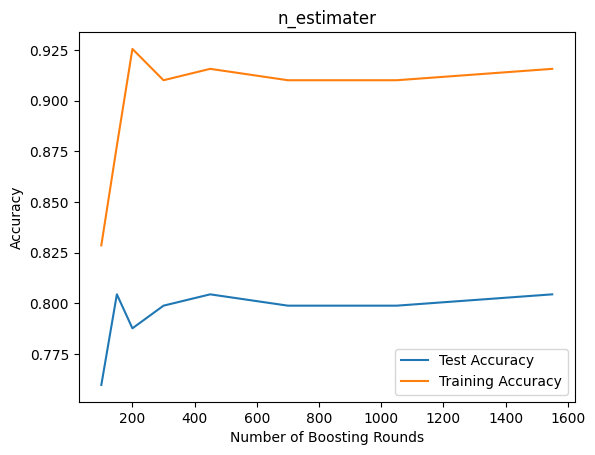

In [55]:
import matplotlib.pyplot as plt
test_accuracies = []
train_accuracies = []
e_estim = [100 , 150, 200 , 300 ,450 ,700 ,1050 , 1550]

# Number of boosting rounds to tr1)

for i in e_estim:
    # Fit the model on the training data
    clf = GradientBoostingClassifier( n_estimators = i,learning_rate = 0.1,max_depth = 2, min_samples_split=10)

    clf.fit(X_train, y_train)
    
    
    # Calculate and store accuracies
    test = clf.score(X_test, y_test)
    train = clf.score(X_train,y_train)
    
    test_accuracies.append(test)
    train_accuracies.append(train)

# Plotting the accuracies
#plt.figure(figsize=(10, 6))
plt.plot(e_estim, test_accuracies, label='Test Accuracy')
plt.plot(e_estim, train_accuracies, label='Training Accuracy')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('n_estimater')
plt.legend()
plt.show()

Было очень тяжело но, я смог . Я иницризировал самые основные , это
1)n_estimators - число деревьев
2)learning_rate - количесвто шагов
3)max_depth - глубина
4)min_samples_split - минимальное количество образцов 
дальше я стренировал (n_esitmators) и добавил в список для дальнейшего работы и с ним , чтоб его бустить.  Дальше все из классной работы , функции не функции и их подстраивал для класса .
.Было проблемой сделать метод score , точнее его реализации. Спасибо Байе , он  пояснил как делать score 